# Wine Quality Prediction

## 1. Data Analysis

In [7]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv("winequalityN.csv")
df.dropna(inplace=True)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6463.0,7.217755,1.297913,3.80000,6.40000,7.00000,7.700,15.90000
volatile acidity,6463.0,0.339589,0.164639,0.08000,0.23000,0.29000,0.400,1.58000
citric acid,6463.0,0.318758,0.145252,0.00000,0.25000,0.31000,0.390,1.66000
residual sugar,6463.0,5.443958,4.756852,0.60000,1.80000,3.00000,8.100,65.80000
chlorides,6463.0,0.056056,0.035076,0.00900,0.03800,0.04700,0.065,0.61100
free sulfur dioxide,6463.0,30.516865,17.758815,1.00000,17.00000,29.00000,41.000,289.00000
total sulfur dioxide,6463.0,115.694492,56.526736,6.00000,77.00000,118.00000,156.000,440.00000
density,6463.0,0.994698,0.003001,0.98711,0.99233,0.99489,0.997,1.03898
pH,6463.0,3.218332,0.160650,2.72000,3.11000,3.21000,3.320,4.01000
sulphates,6463.0,0.531150,0.148913,0.22000,0.43000,0.51000,0.600,2.00000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

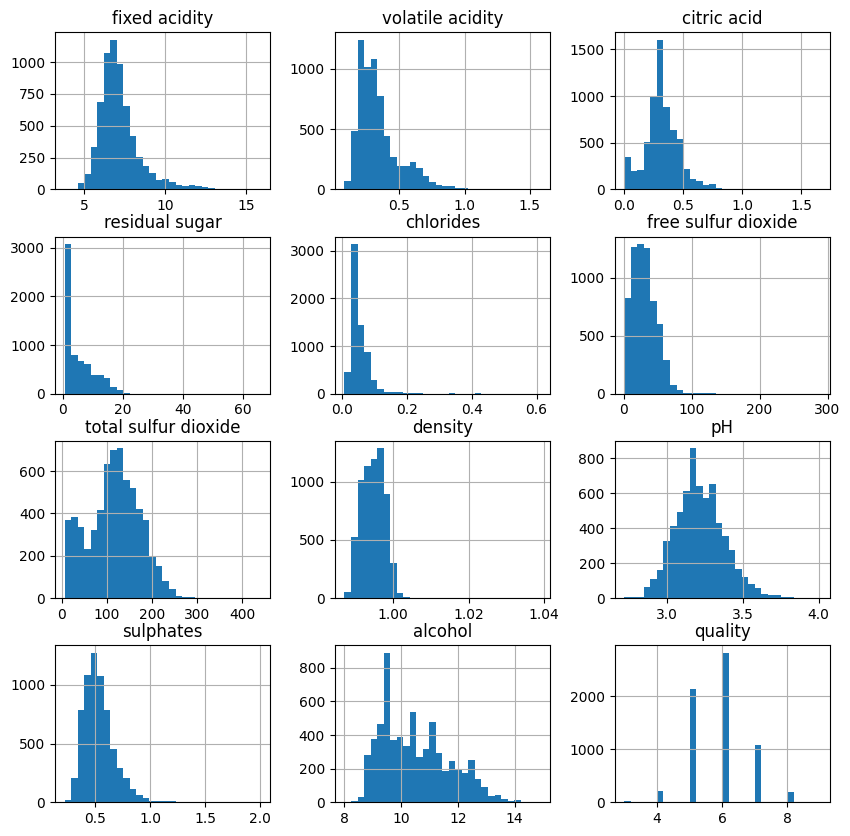

In [45]:
df.hist(bins = 30, figsize = (10, 10))

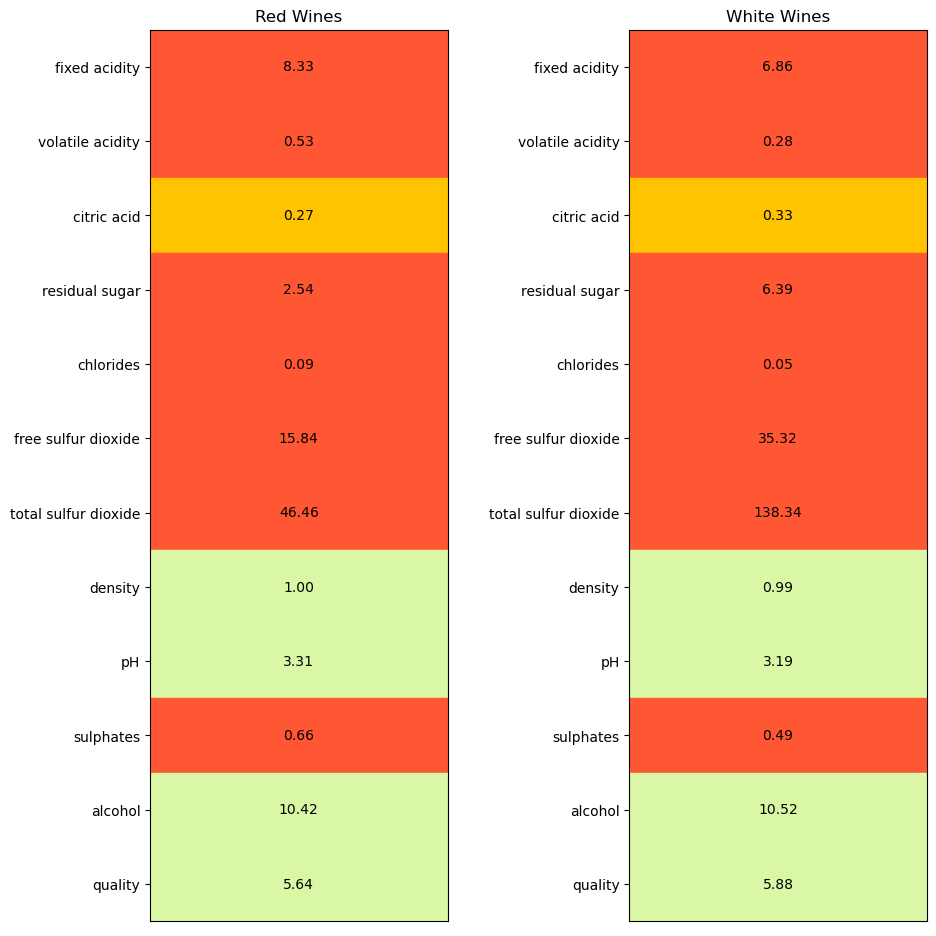

In [10]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Original data setup
red_wines = df[df['type'] == "red"].describe().T
white_wines = df[df['type'] == "white"].describe().T

# Calculate the percentage difference
percent_difference = 100 * (red_wines['mean'] - white_wines['mean']) / white_wines['mean']

# Define a function to determine the color based on the percentage difference
def get_color(value):
    if np.abs(value) >= 20:
        return '#FF5733'  # More intense color for larger differences
    elif np.abs(value) >= 10:
        return '#FFC300'  # Moderate color for medium differences
    else:
        return '#DAF7A6'  # Muted color for smaller differences

# Apply the color function to each category
colors = percent_difference.apply(get_color)

# Function to plot heatmap in a pillar format
def plot_pillar_heatmap(ax, data, colors):
    # Create a grid for the heatmap
    heatmap_data = np.array(data).reshape(-1, 1)
    heatmap_colors = np.array(colors.apply(lambda x: matplotlib.colors.to_rgba(x))).reshape(-1, 1)
    
    # Plotting the heatmap
    ax.imshow(heatmap_data, aspect='auto', cmap='Greys', vmin=0, vmax=1)
    
    # Manually setting the colors of each cell
    for y in range(heatmap_data.shape[0]):
        for x in range(heatmap_data.shape[1]):
            ax.add_patch(plt.Rectangle((x - 0.5, y - 0.5), 1, 1, color=heatmap_colors[y, x]))

    # Adding the text
    for i, value in enumerate(data):
        ax.text(0, i, f'{value:.2f}', ha='center', va='center', color='black')

    # Setting the ticks
    ax.set_xticks([])
    ax.set_yticks(np.arange(len(data)))
    ax.set_yticklabels(data.index)

# Creating the heatmaps
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

# Red Wines Heatmap
plot_pillar_heatmap(ax[0], red_wines['mean'], colors)
ax[0].set_title('Red Wines')

# White Wines Heatmap
plot_pillar_heatmap(ax[1], white_wines['mean'], colors)
ax[1].set_title('White Wines')

fig.tight_layout(pad=3)
plt.savefig('mean_differences_heatmap.pdf')
plt.show()


## 1.2 Run PCA

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("winequalityN.csv")
df.dropna(inplace=True)
df['type'] = df['type'].replace({'red': 0, 'white': 1})
X = df.drop('quality', axis=1)  # Features (all columns except 'quality')
y = df['quality']

X_std = StandardScaler().fit_transform(X)

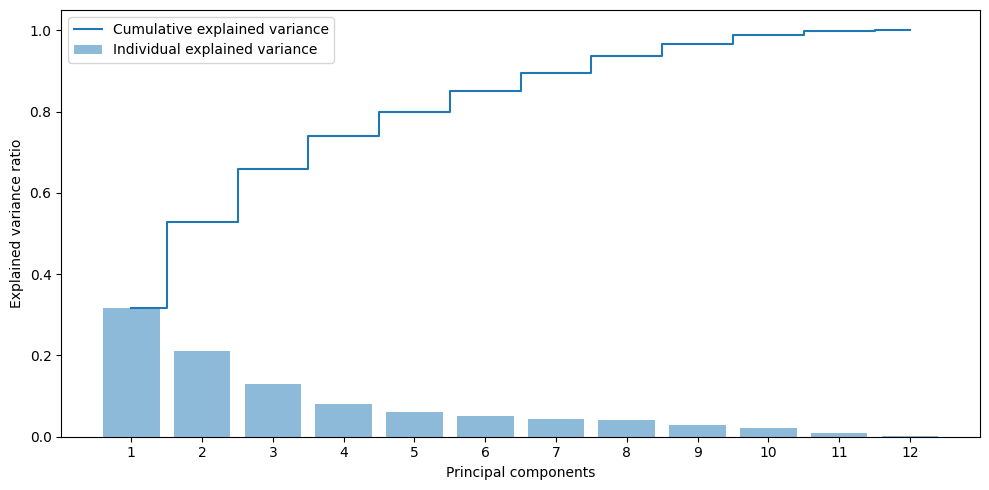

In [29]:


# Perform PCA
pca = PCA()
principalComponents = pca.fit_transform(X_std)

# Create a bar plot for variance explained by each principal component
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Adding 1 because Python indexes from 0
plt.legend(loc='best')
plt.tight_layout()
plt.show()

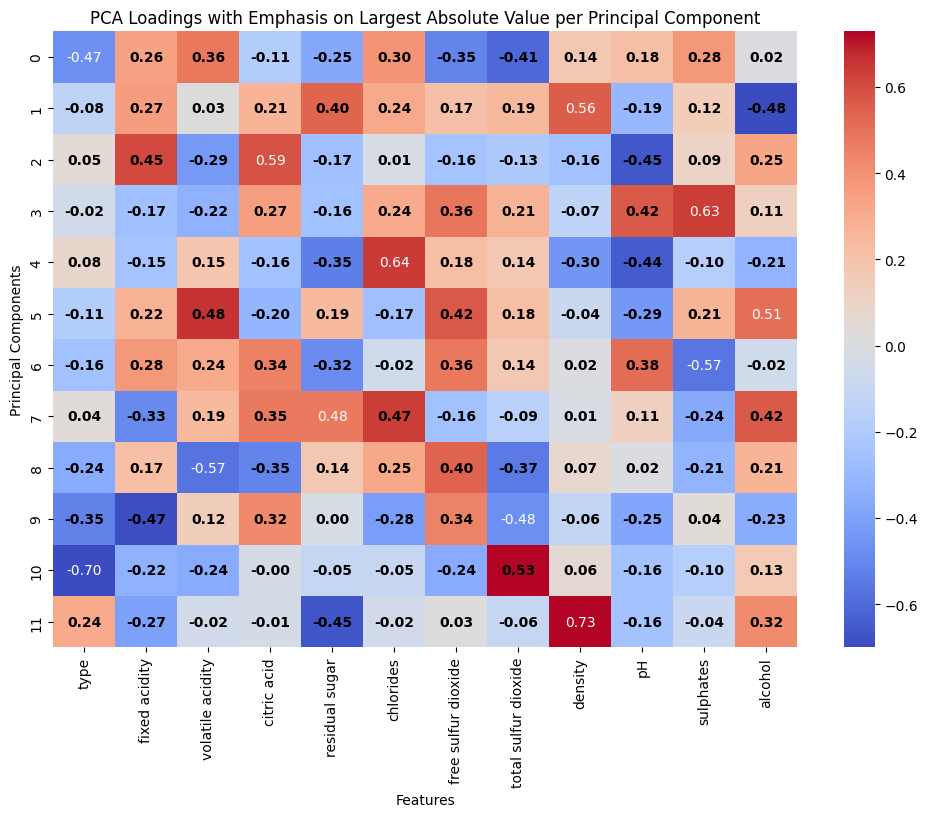

In [35]:

loadings = pca.components_

# Display the loadings
loadings = pd.DataFrame(loadings, columns=X.columns)

mask = np.zeros_like(loadings, dtype=bool)
for i, row in enumerate(loadings.values):
    max_index = np.argmax(np.abs(row))
    mask[i, max_index] = True

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', mask=~mask, fmt=".2f")
sns.heatmap(loadings, annot=True, cmap='coolwarm', mask=mask, fmt=".2f", cbar=False, annot_kws={"weight": "bold", "color": "black"})

# Additional plot formatting
plt.title("PCA Loadings with Emphasis on Largest Absolute Value per Principal Component")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()

## 2.1 Linear Regression

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
df = pd.read_csv("winequalityN.csv")
df.dropna(inplace=True)
df['type'] = df['type'].replace({'red': 0, 'white': 1})
X = df.drop('quality', axis=1)  # Features (all columns except 'quality')
y = df['quality']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.5406592848055256
R^2 Score: 0.29022771380876033


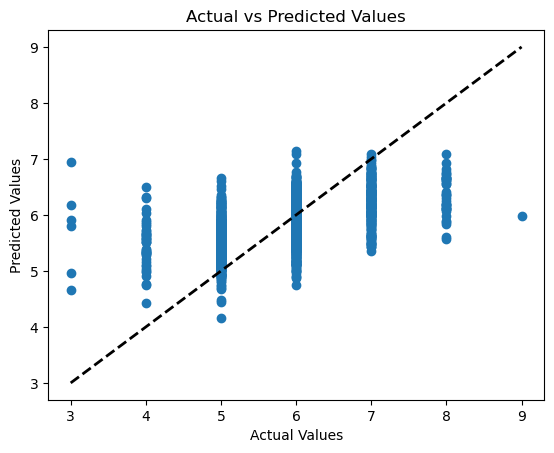

In [16]:
import matplotlib.pyplot as plt



# Optionally, you can plot a line for perfect predictions
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

## 2.2 Logistic Regression

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [68]:
df = pd.read_csv("winequalityN.csv")
df.dropna(inplace=True)
df['type'] = df['type'].replace({'red': 0, 'white': 1})
X = df.drop('quality', axis=1)  # Features (all columns except 'quality')
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
y_pred = model.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.sort(df['quality'].unique()))
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.46403712296983757
Confusion Matrix:
 [[  0   0   2   4   0   0   0]
 [  0   0  19  24   0   0   0]
 [  0   0 191 235   0   0   0]
 [  0   0 152 408   4   0   0]
 [  0   0  31 183   1   0   0]
 [  0   0   2  34   2   0   0]
 [  0   0   1   0   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.48      0.45      0.46       426
           6       0.46      0.72      0.56       564
           7       0.14      0.00      0.01       215
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

    accuracy                           0.46      1293
   macro avg       0.15      0.17      0.15      1293
weighted avg       0.38      0.46      0.40      1293



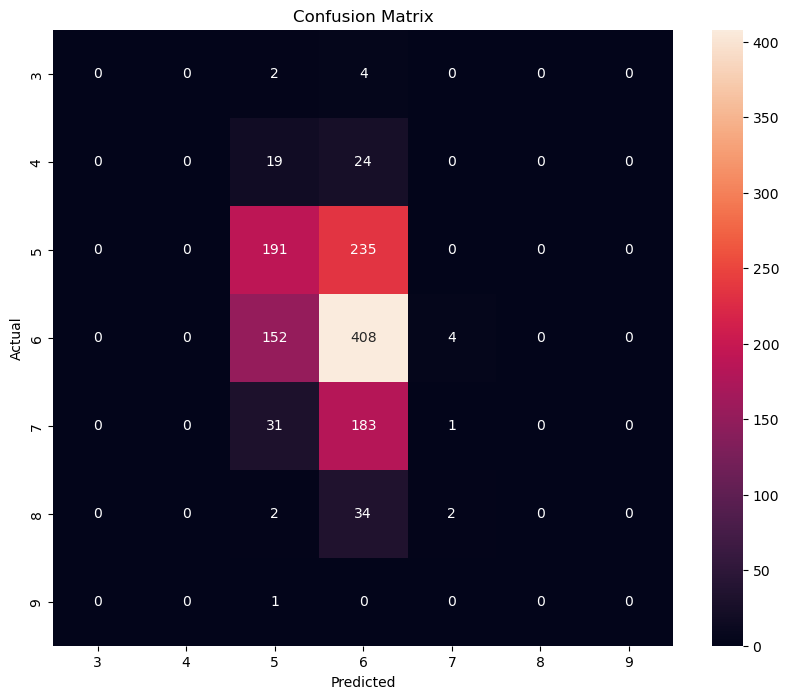

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.sort(df['quality'].unique()))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=np.sort(df['quality'].unique()), yticklabels=np.sort(df['quality'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 2.3 Naive-Bayes

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # For numerical features
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [82]:
df = pd.read_csv("winequalityN.csv")
df.dropna(inplace=True)
df['type'] = df['type'].replace({'red': 0, 'white': 1})
X = df.drop('quality', axis=1)  # Features (all columns except 'quality')
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [83]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [86]:
y_pred = model.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.sort(df['quality'].unique()))
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.402938901778809
Confusion Matrix:
 [[  2   0   2   1   1   0   0]
 [  2   7  14  13   6   0   1]
 [ 12  11 194 170  38   1   0]
 [  8  14 150 227 150   3  12]
 [  2   3  20  68  88   9  25]
 [  0   0   2   8  23   3   2]
 [  0   0   0   1   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.08      0.33      0.12         6
           4       0.20      0.16      0.18        43
           5       0.51      0.46      0.48       426
           6       0.47      0.40      0.43       564
           7       0.29      0.41      0.34       215
           8       0.19      0.08      0.11        38
           9       0.00      0.00      0.00         1

    accuracy                           0.40      1293
   macro avg       0.25      0.26      0.24      1293
weighted avg       0.43      0.40      0.41      1293



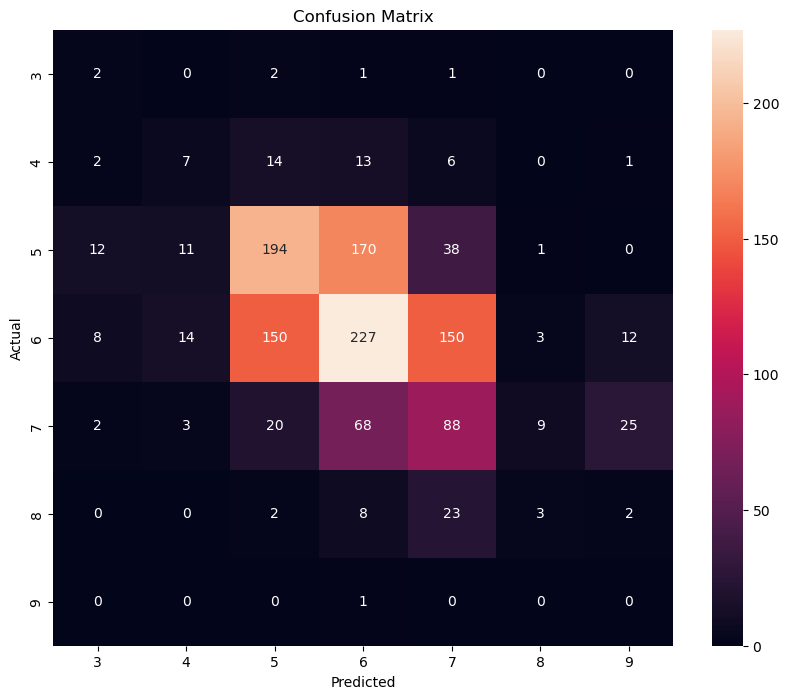

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=np.sort(df['quality'].unique()), yticklabels=np.sort(df['quality'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2.4 K-Nearest Neighbors

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler  # For feature scaling


In [107]:
df = pd.read_csv("winequalityN.csv")
df.dropna(inplace=True)
df['type'] = df['type'].replace({'red': 0, 'white': 1})
X = df.drop('quality', axis=1)  # Features (all columns except 'quality')
y = df['quality']


In [108]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [127]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=15)

In [128]:
y_pred = knn.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.sort(df['quality'].unique()))
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.588553750966744
Confusion Matrix:
 [[  0   0   2   4   0   0   0]
 [  0   1  24  17   1   0   0]
 [  0   1 283 134   8   0   0]
 [  0   1 127 384  50   2   0]
 [  0   0  14 106  93   2   0]
 [  0   0   0  19  19   0   0]
 [  0   0   0   1   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.33      0.02      0.04        43
           5       0.63      0.66      0.65       426
           6       0.58      0.68      0.62       564
           7       0.54      0.43      0.48       215
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1293
   macro avg       0.30      0.26      0.26      1293
weighted avg       0.56      0.59      0.57      1293



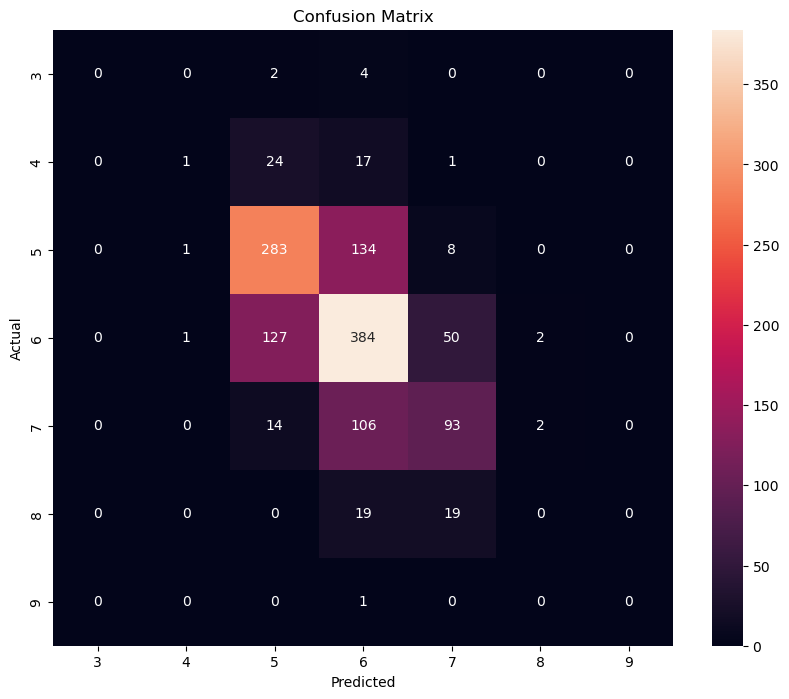

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=np.sort(df['quality'].unique()), yticklabels=np.sort(df['quality'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2.5 Decision Tree

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [100]:
df = pd.read_csv("winequalityN.csv")
df.dropna(inplace=True)
df['type'] = df['type'].replace({'red': 0, 'white': 1})
X = df.drop('quality', axis=1)  # Features (all columns except 'quality')
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)



In [101]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [104]:
y_pred = model.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.sort(df['quality'].unique()))
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6094354215003867
Confusion Matrix:
 [[  0   0   3   2   1   0   0]
 [  2   7  17  14   3   0   0]
 [  0  12 289  99  23   3   0]
 [  0  13 108 356  71  15   1]
 [  0   1  18  63 120  12   1]
 [  1   1   4  14   2  16   0]
 [  0   0   0   0   0   1   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.16      0.18        43
           5       0.66      0.68      0.67       426
           6       0.65      0.63      0.64       564
           7       0.55      0.56      0.55       215
           8       0.34      0.42      0.38        38
           9       0.00      0.00      0.00         1

    accuracy                           0.61      1293
   macro avg       0.34      0.35      0.35      1293
weighted avg       0.61      0.61      0.61      1293



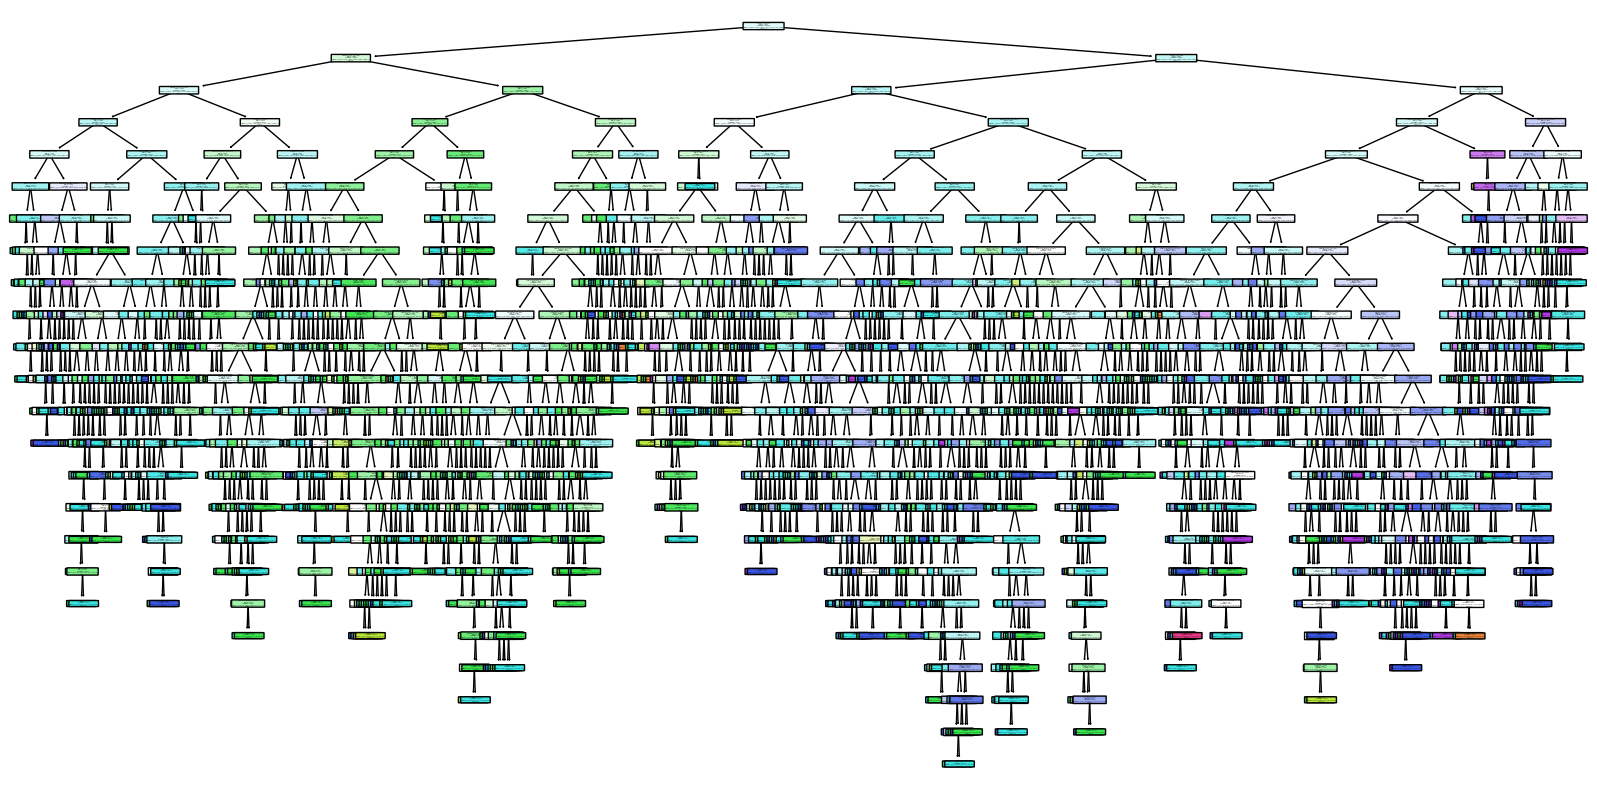

In [103]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=str(model.classes_), rounded=True, proportion=True)
plt.show()


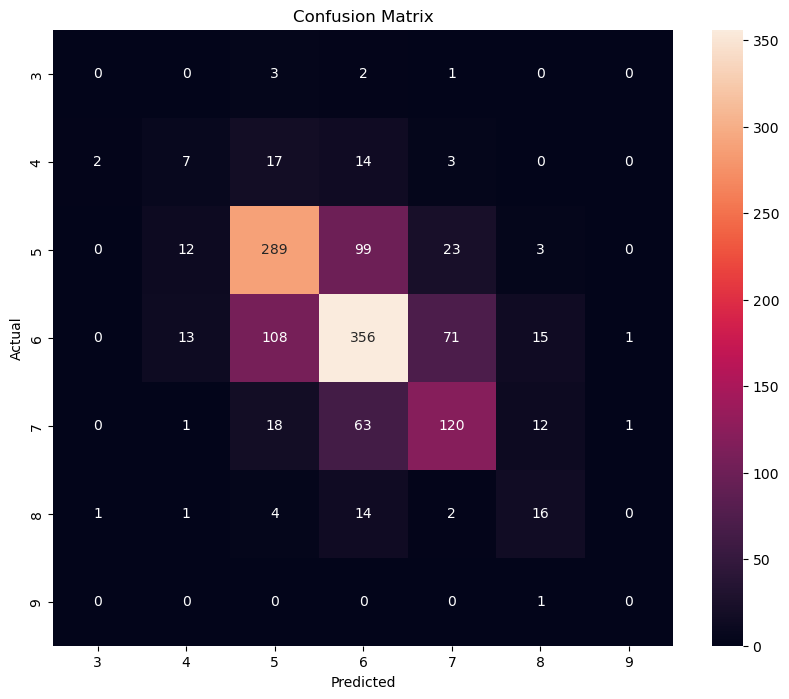

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=np.sort(df['quality'].unique()), yticklabels=np.sort(df['quality'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2.6 SVC

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler  # SVM performs better with feature scaling


In [132]:
df = pd.read_csv("winequalityN.csv")
df.dropna(inplace=True)
df['type'] = df['type'].replace({'red': 0, 'white': 1})
X = df.drop('quality', axis=1)  # Features (all columns except 'quality')
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)



In [133]:
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [135]:
y_pred = svm_model.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.sort(df['quality'].unique()))
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.5815931941221965
Confusion Matrix:
 [[  0   0   3   3   0   0   0]
 [  0   0  28  15   0   0   0]
 [  0   0 276 150   0   0   0]
 [  0   0 114 425  25   0   0]
 [  0   0   9 155  51   0   0]
 [  0   0   0  27  11   0   0]
 [  0   0   0   1   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.64      0.65      0.64       426
           6       0.55      0.75      0.63       564
           7       0.59      0.24      0.34       215
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1293
   macro avg       0.25      0.23      0.23      1293
weighted avg       0.55      0.58      0.55      1293



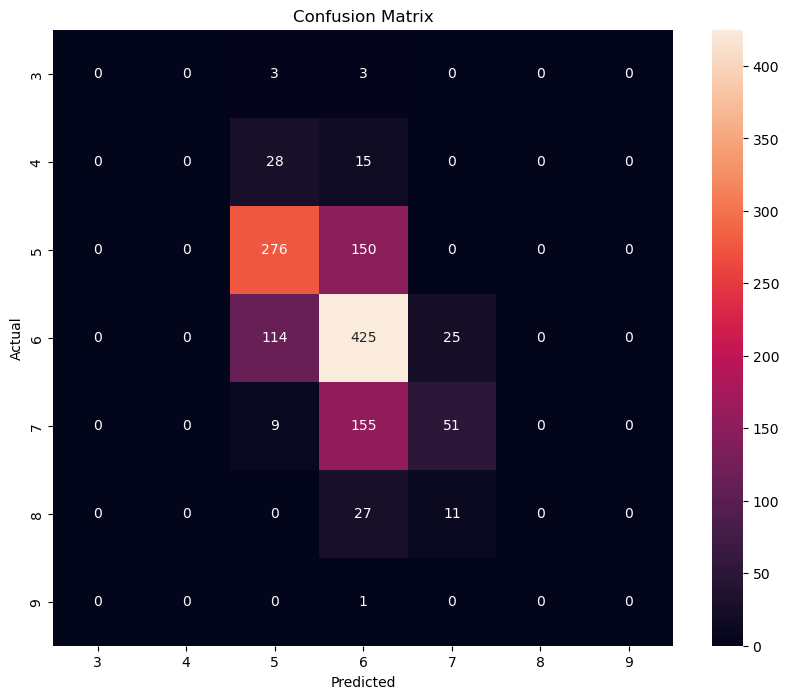

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=np.sort(df['quality'].unique()), yticklabels=np.sort(df['quality'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2.7 Artificial Neural Network 1

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report


In [61]:
df = pd.read_csv("winequalityN.csv")
df.dropna(inplace=True)
df['type'] = df['type'].replace({'red': 0, 'white': 1})
X = df.drop('quality', axis=1)  # Features (all columns except 'quality')
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)



In [54]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target variable
y_encoded = to_categorical(y)



# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=y_test_encoded.shape[1], activation='softmax'))  # Output layer with softmax

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train_encoded, batch_size=10, epochs=100)

Epoch 1/100
517/517 [==============================] - 0s 595us/step - loss: 1.1497 - accuracy: 0.5335 - val_loss: 1.0947 - val_accuracy: 0.5352
Epoch 2/100
517/517 [==============================] - 0s 595us/step - loss: 1.0526 - accuracy: 0.5555 - val_loss: 1.0593 - val_accuracy: 0.5514
Epoch 3/100
517/517 [==============================] - 0s 477us/step - loss: 1.0279 - accuracy: 0.5623 - val_loss: 1.0546 - val_accuracy: 0.5561
Epoch 4/100
517/517 [==============================] - 0s 488us/step - loss: 1.0081 - accuracy: 0.5712 - val_loss: 1.0307 - val_accuracy: 0.5584
Epoch 5/100
517/517 [==============================] - 0s 496us/step - loss: 0.9918 - accuracy: 0.5785 - val_loss: 1.0253 - val_accuracy: 0.5692
Epoch 6/100
517/517 [==============================] - 0s 499us/step - loss: 0.9789 - accuracy: 0.5793 - val_loss: 1.0153 - val_accuracy: 0.5661
Epoch 7/100
517/517 [==============================] - 0s 489us/step - loss: 0.9674 - accuracy: 0.5797 - val_loss: 1.0253 - val_ac

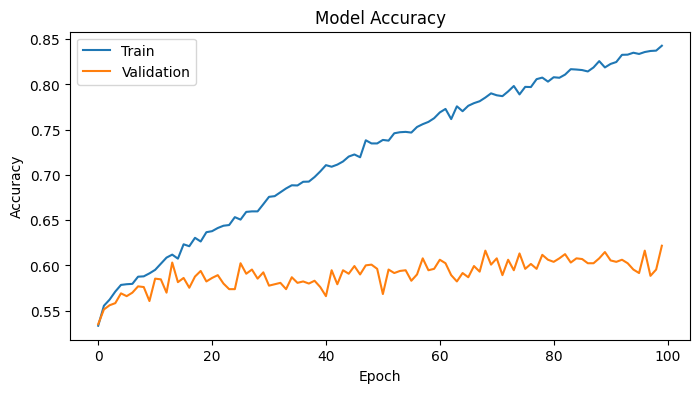

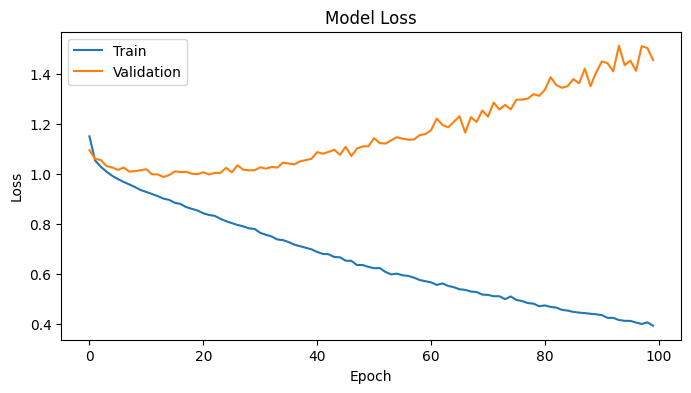

In [68]:
y_adjusted = y - y.min()

# Number of unique classes
num_classes = len(y_adjusted.unique())

# One-hot encode the adjusted target variable
y_encoded = to_categorical(y_adjusted, num_classes=num_classes)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define the ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=10, validation_data=(X_test, y_test_encoded))

# Plotting training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


41/41 [==============================] - 0s 676us/step


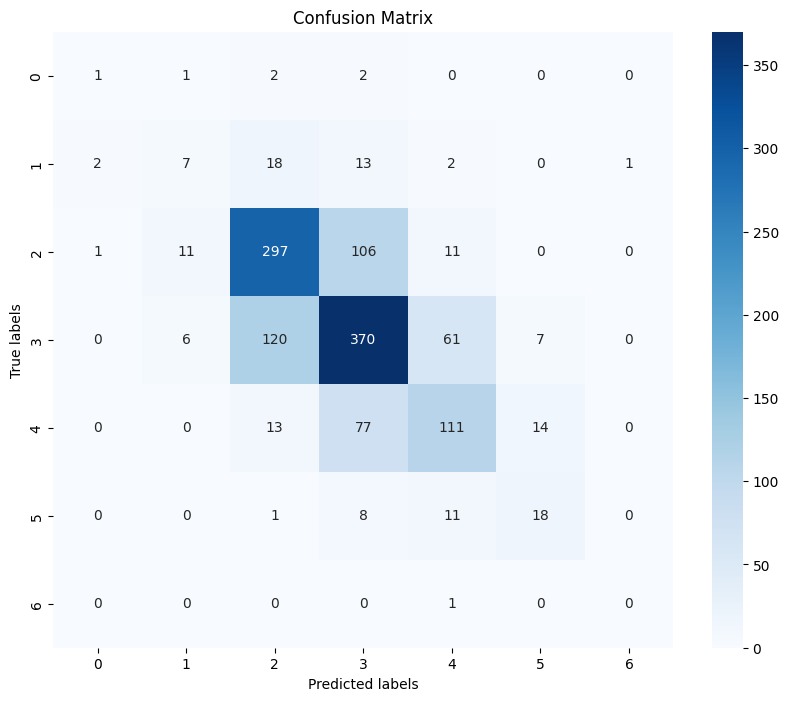

In [69]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 2.7 Artificial Neural Network 2

Epoch 1/150
162/162 [==============================] - 1s 1ms/step - loss: 1.8132 - accuracy: 0.3791 - val_loss: 1.2800 - val_accuracy: 0.5251
Epoch 2/150
162/162 [==============================] - 0s 1ms/step - loss: 1.3198 - accuracy: 0.5015 - val_loss: 1.0917 - val_accuracy: 0.5599
Epoch 3/150
162/162 [==============================] - 0s 1ms/step - loss: 1.1751 - accuracy: 0.5172 - val_loss: 1.0374 - val_accuracy: 0.5669
Epoch 4/150
162/162 [==============================] - 0s 1ms/step - loss: 1.1216 - accuracy: 0.5199 - val_loss: 1.0287 - val_accuracy: 0.5770
Epoch 5/150
162/162 [==============================] - 0s 1ms/step - loss: 1.0816 - accuracy: 0.5325 - val_loss: 1.0322 - val_accuracy: 0.5561
Epoch 6/150
162/162 [==============================] - 0s 1ms/step - loss: 1.0847 - accuracy: 0.5344 - val_loss: 1.0328 - val_accuracy: 0.5623
Epoch 7/150
162/162 [==============================] - 0s 1ms/step - loss: 1.0706 - accuracy: 0.5366 - val_loss: 1.0067 - val_accuracy: 0.5692

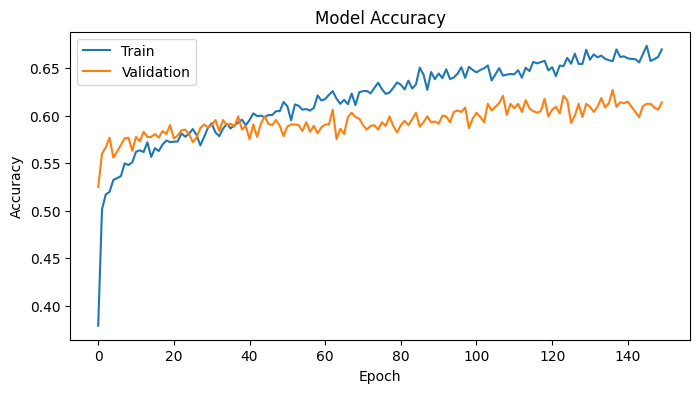

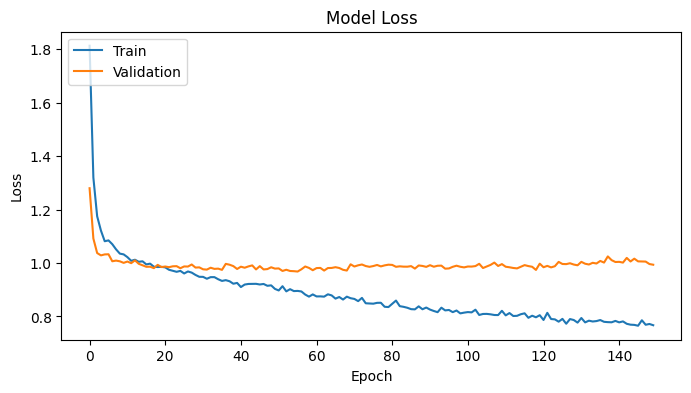

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


y_adjusted = y - y.min()

# Number of unique classes
num_classes = len(y_adjusted.unique())

# One-hot encode the adjusted target variable
y_encoded = to_categorical(y_adjusted, num_classes=num_classes)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

y_min = y.min()
y_adjusted = y - y_min

# Number of unique classes
num_classes = len(y_adjusted.unique())

# One-hot encode the adjusted target variable
y_encoded = to_categorical(y_adjusted, num_classes=num_classes)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define the ANN model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=150, batch_size=32, validation_data=(X_test, y_test_encoded))

# Plotting training and validation accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

41/41 [==============================] - 0s 508us/step


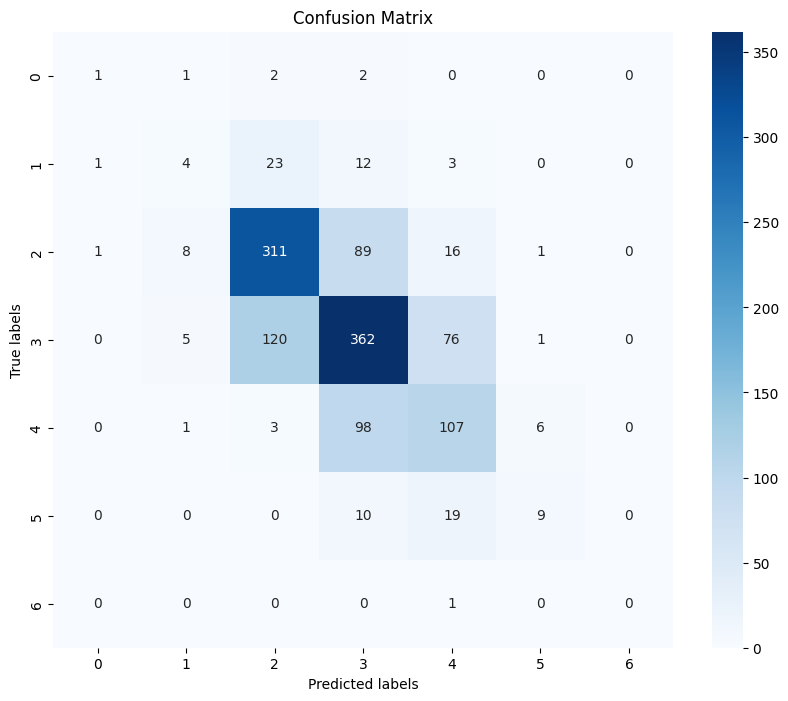

In [67]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [71]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               1664      
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 7)                 455       
                                                                 
Total params: 10375 (40.53 KB)
Trainable params: 10375 (40.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 256)               3328      
                                                                 
 batch_normalization_15 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_51 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_16 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 128)             